In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

---
**Reference**

Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

In [24]:
num_obs = df.shape[0]
print(f"Dataset contains {num_obs} rows")

Dataset contains 2111 rows


In [8]:
# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height']**2)

# Summary statistics for continuous variables
cont_vars = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
desc_stats = df[cont_vars].describe().T[['mean', '50%', 'std', 'min', 'max']]
desc_stats.rename(columns={'50%': 'median'}, inplace=True)

print("Continuous Variable Statistics:")
display(desc_stats)

# Categorical variable frequencies
cat_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
print("\nCategorical Variable Frequencies:")
for var in cat_vars:
    print(f"\n{var}:")
    display(df[var].value_counts(normalize=True).mul(100).round(1))

Continuous Variable Statistics:


,mean,median,std,min,max
Age,24.312600,22.777890,6.345968,14.000000,61.000000
Height,1.701677,1.700499,0.093305,1.450000,1.980000
Weight,86.586058,83.000000,26.191172,39.000000,173.000000
BMI,29.700159,28.719089,8.011337,12.998685,50.811753
FCVC,2.419043,2.385502,0.533927,1.000000,3.000000
NCP,2.685628,3.000000,0.778039,1.000000,4.000000
CH2O,2.008011,2.000000,0.612953,1.000000,3.000000
FAF,1.010298,1.000000,0.850592,0.000000,3.000000
TUE,0.657866,0.625350,0.608927,0.000000,2.000000



Categorical Variable Frequencies:

Gender:


Gender
Male      50.6
Female    49.4
Name: proportion, dtype: float64


family_history_with_overweight:


family_history_with_overweight
yes    81.8
no     18.2
Name: proportion, dtype: float64


FAVC:


FAVC
yes    88.4
no     11.6
Name: proportion, dtype: float64


CAEC:


CAEC
Sometimes     83.6
Frequently    11.5
Always         2.5
no             2.4
Name: proportion, dtype: float64


SMOKE:


SMOKE
no     97.9
yes     2.1
Name: proportion, dtype: float64


SCC:


SCC
no     95.5
yes     4.5
Name: proportion, dtype: float64


CALC:


CALC
Sometimes     66.4
no            30.3
Frequently     3.3
Always         0.0
Name: proportion, dtype: float64


MTRANS:


MTRANS
Public_Transportation    74.8
Automobile               21.6
Walking                   2.7
Motorbike                 0.5
Bike                      0.3
Name: proportion, dtype: float64

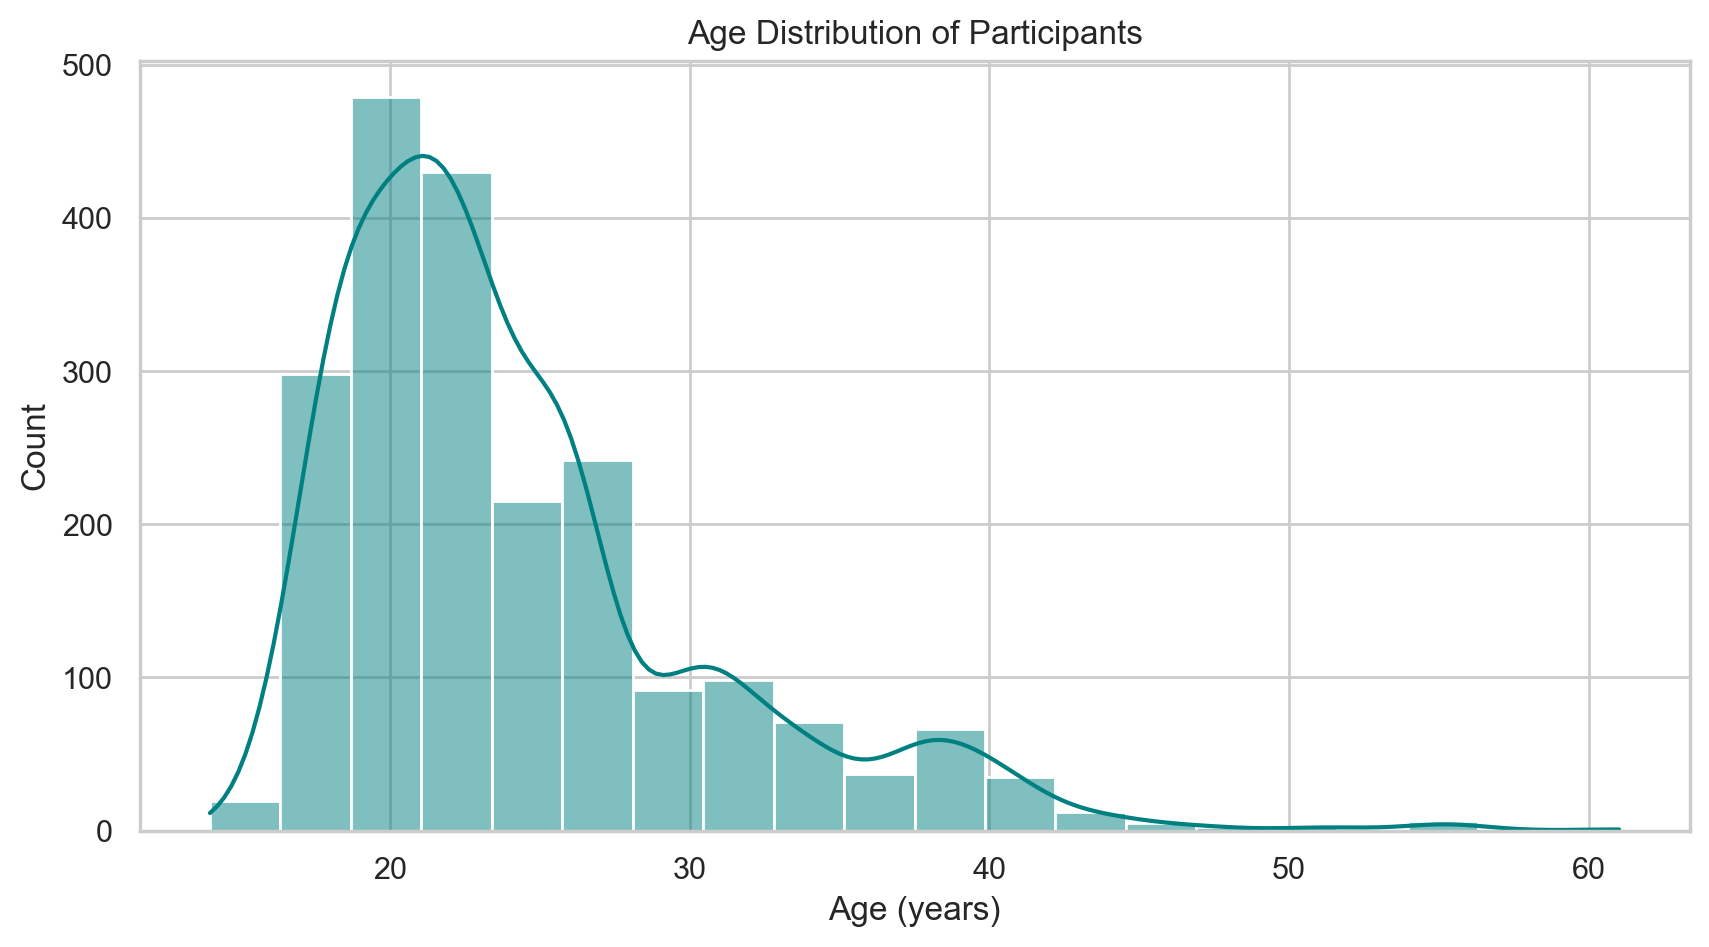

In [11]:
#2. Visualizations
#a. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='teal')
plt.title('Age Distribution of Participants')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

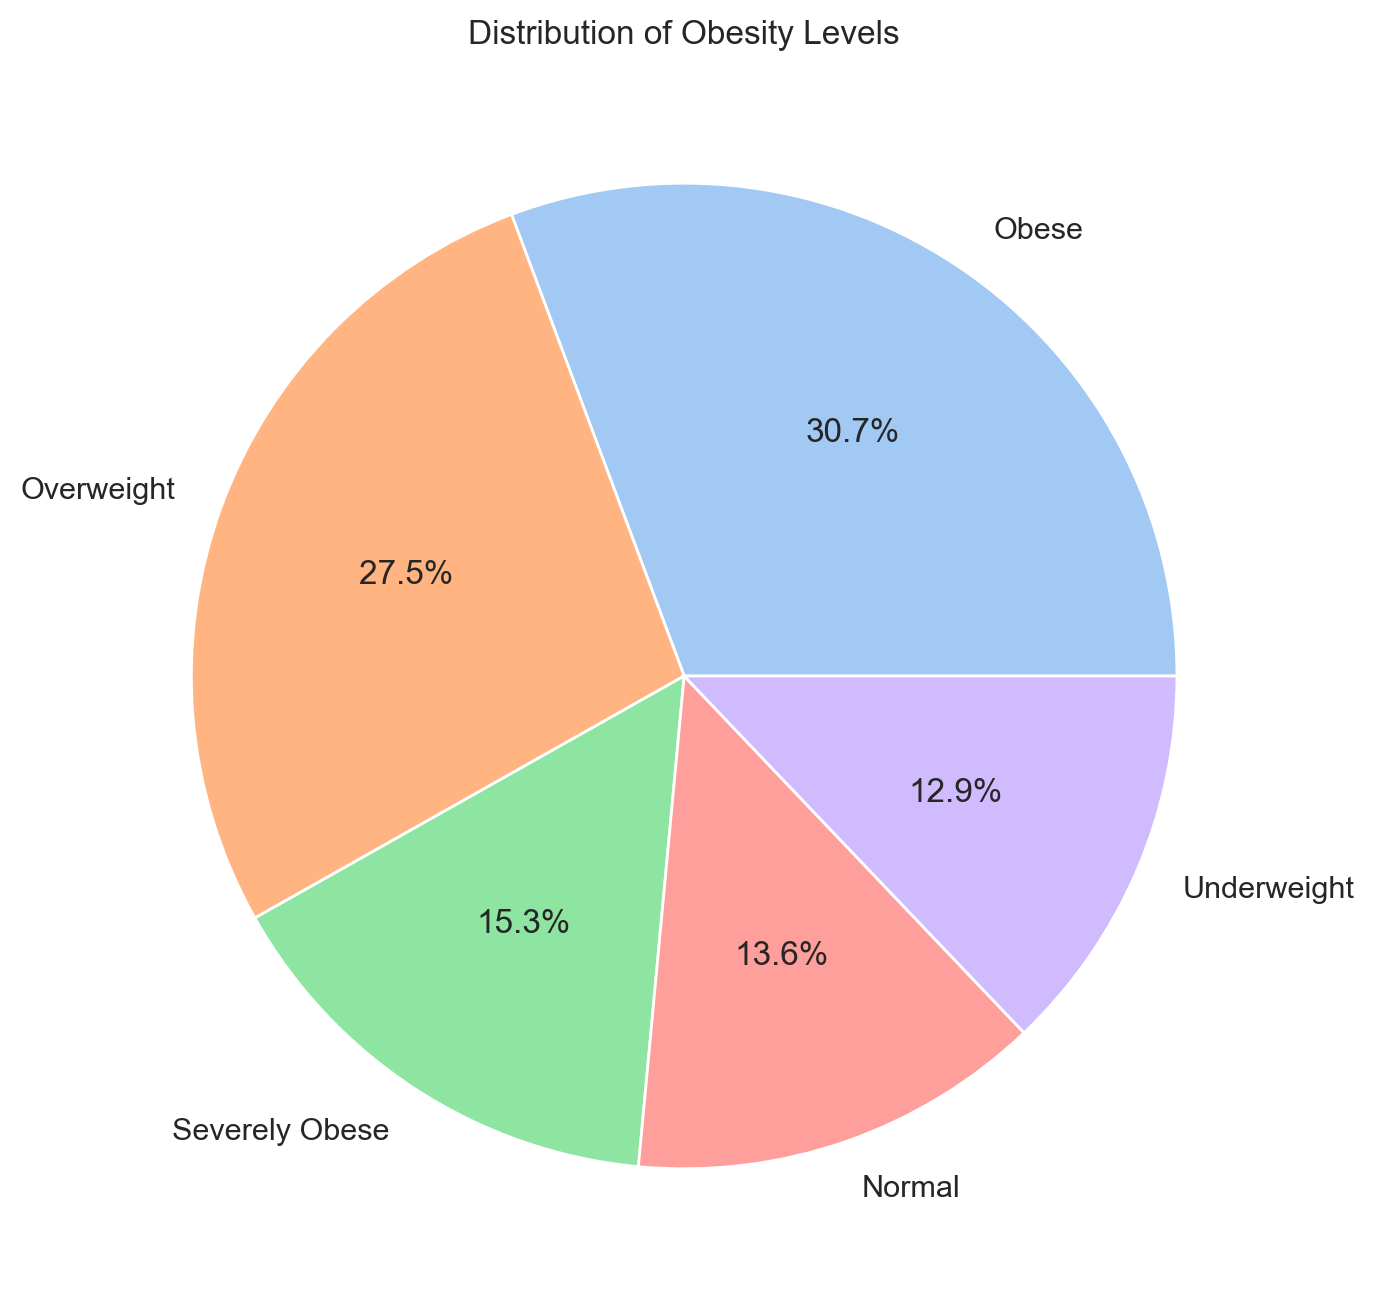

In [12]:
#b. Obesity Level Distribution
obesity_map = {
    'Insufficient_Weight': 'Underweight',
    'Normal_Weight': 'Normal',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Severely Obese'
}
df['Obesity_Class'] = df['NObeyesdad'].map(obesity_map)

# Pie chart
plt.figure(figsize=(8, 8))
df['Obesity_Class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Distribution of Obesity Levels')
plt.ylabel('')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_27100\2919862194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


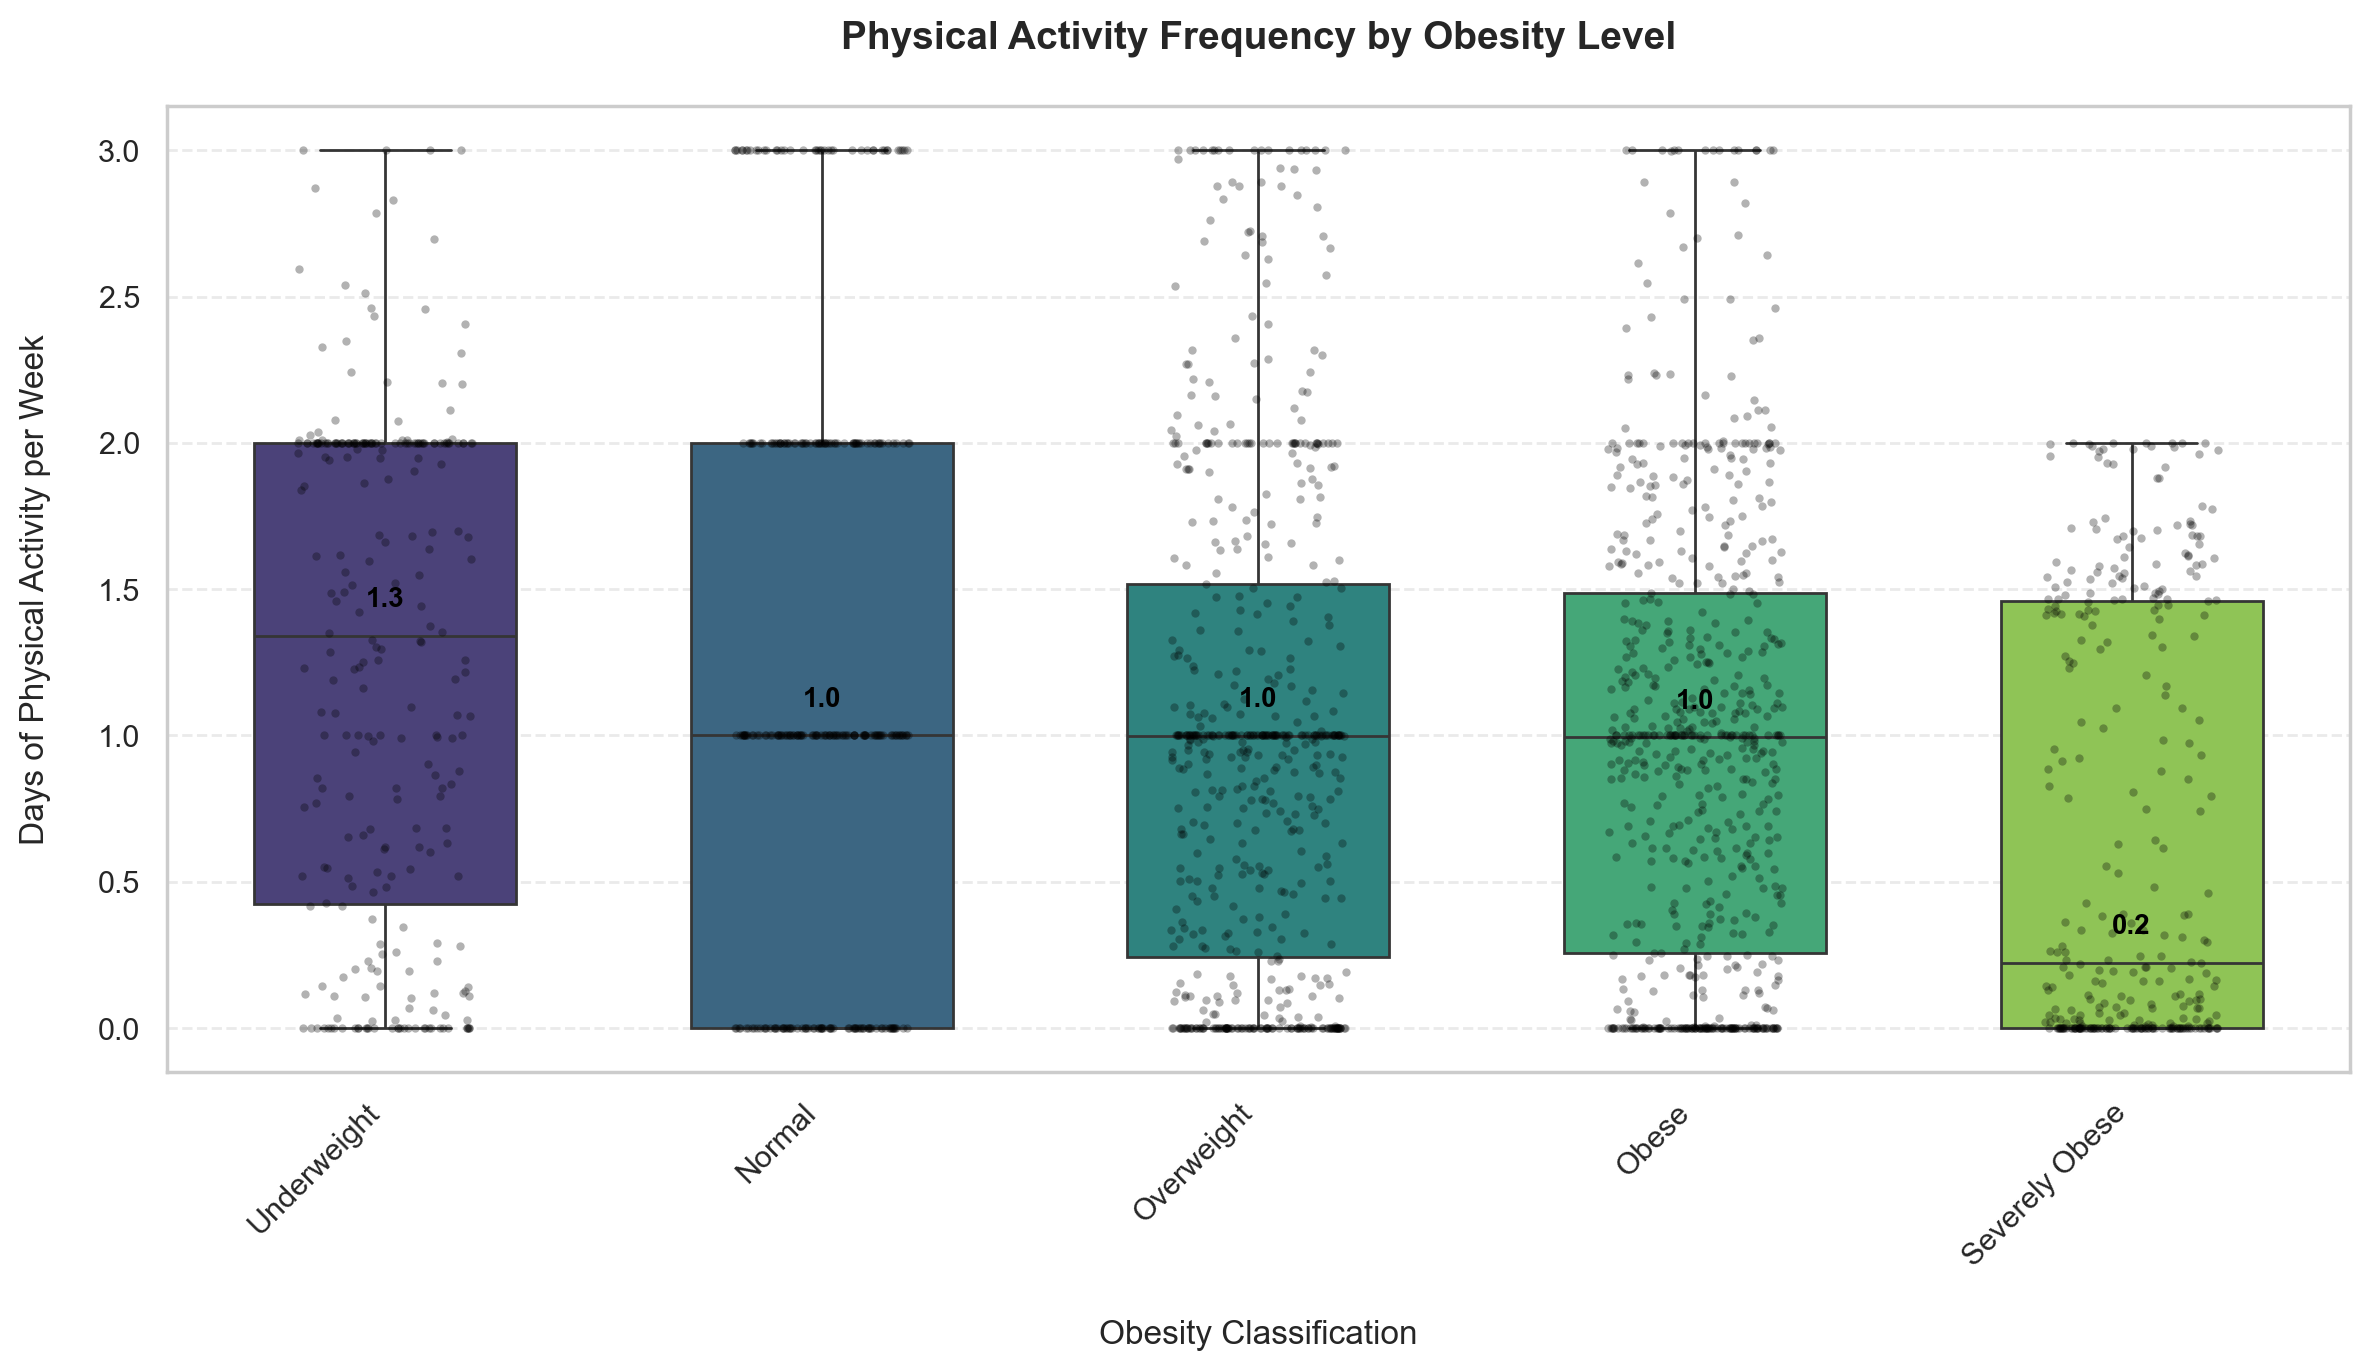

In [16]:
#c. Physical Activity by Obesity Level (Boxplot)

plt.figure(figsize=(12, 7))
order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']

# Create boxplot without swarmplot initially
ax = sns.boxplot(
    data=df,
    x='Obesity_Class',
    y='FAF',
    order=order,
    palette='viridis',
    width=0.6,
    showfliers=False  # Handle outliers separately
)

# Add stripplot with adjusted parameters
sns.stripplot(
    data=df,
    x='Obesity_Class',
    y='FAF',
    order=order,
    color='black',
    alpha=0.3,
    size=3,
    jitter=0.2
)

# Customize plot
plt.title('Physical Activity Frequency by Obesity Level\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nObesity Classification', fontsize=12)
plt.ylabel('Days of Physical Activity per Week\n', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add median labels using iloc to avoid FutureWarning
medians = df.groupby('Obesity_Class')['FAF'].median().loc[order].values
for xtick in range(len(order)):
    ax.text(xtick, medians[xtick]+0.1, f'{medians[xtick]:.1f}', 
            horizontalalignment='center',
            fontsize=10,
            color='black',
            weight='bold')

plt.tight_layout()
plt.show()

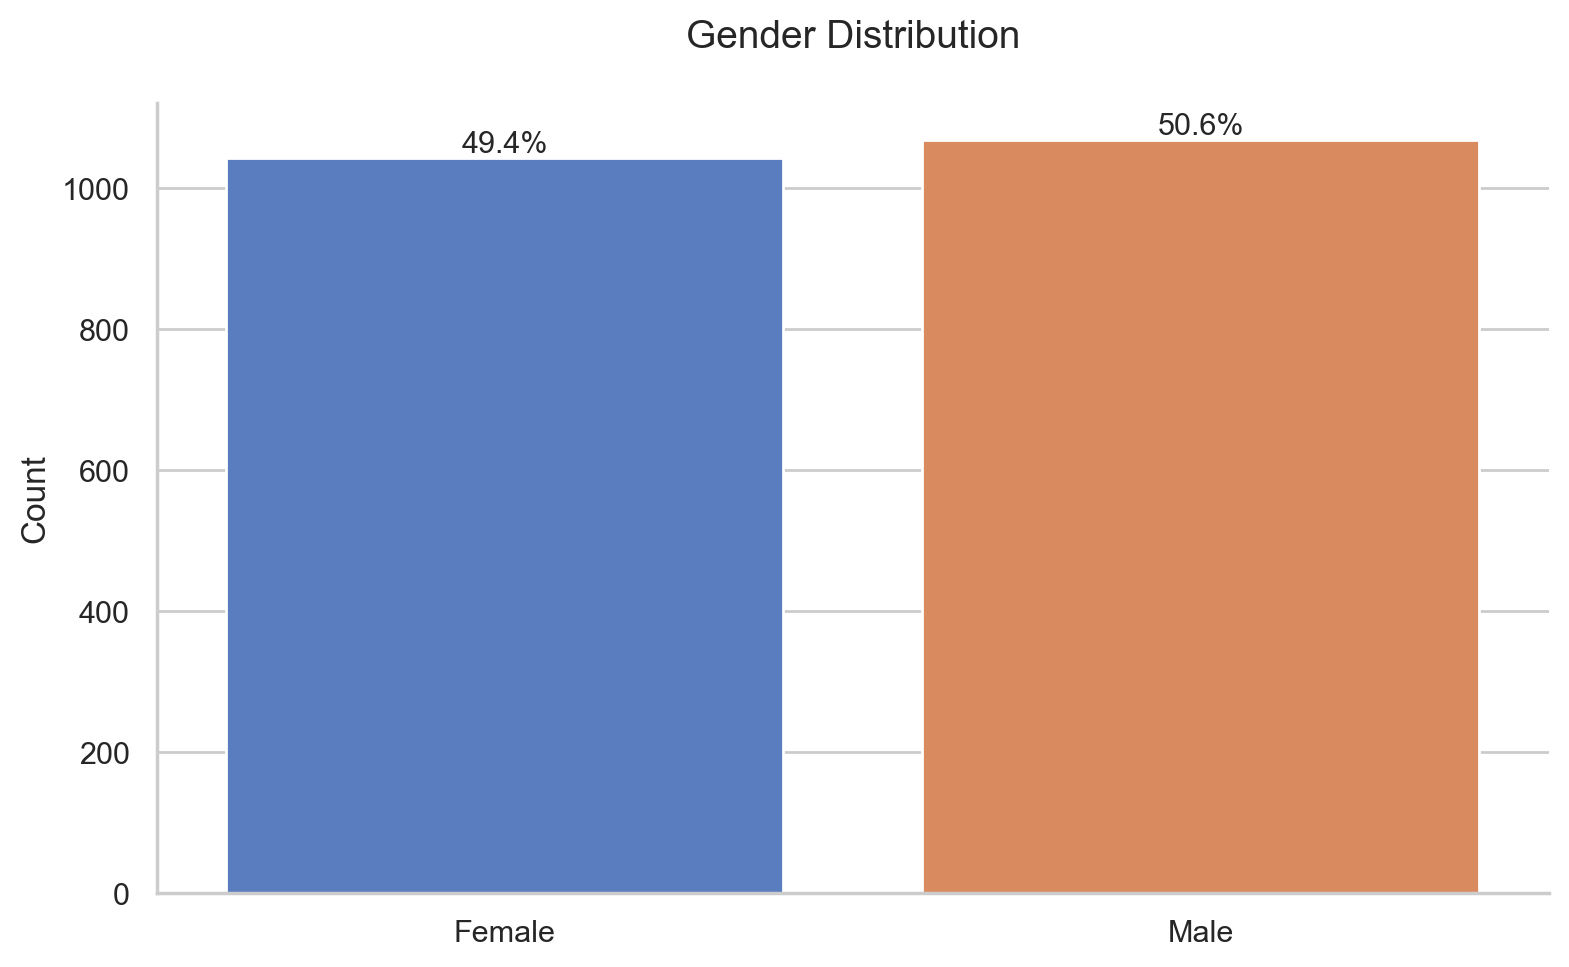

In [18]:
#d Categorical variable Distributions

#Gender Distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='Gender',
    hue='Gender',  # Added to resolve warning
    palette='muted',
    legend=False   # Added to hide redundant legend
)
plt.title('Gender Distribution', pad=20, fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

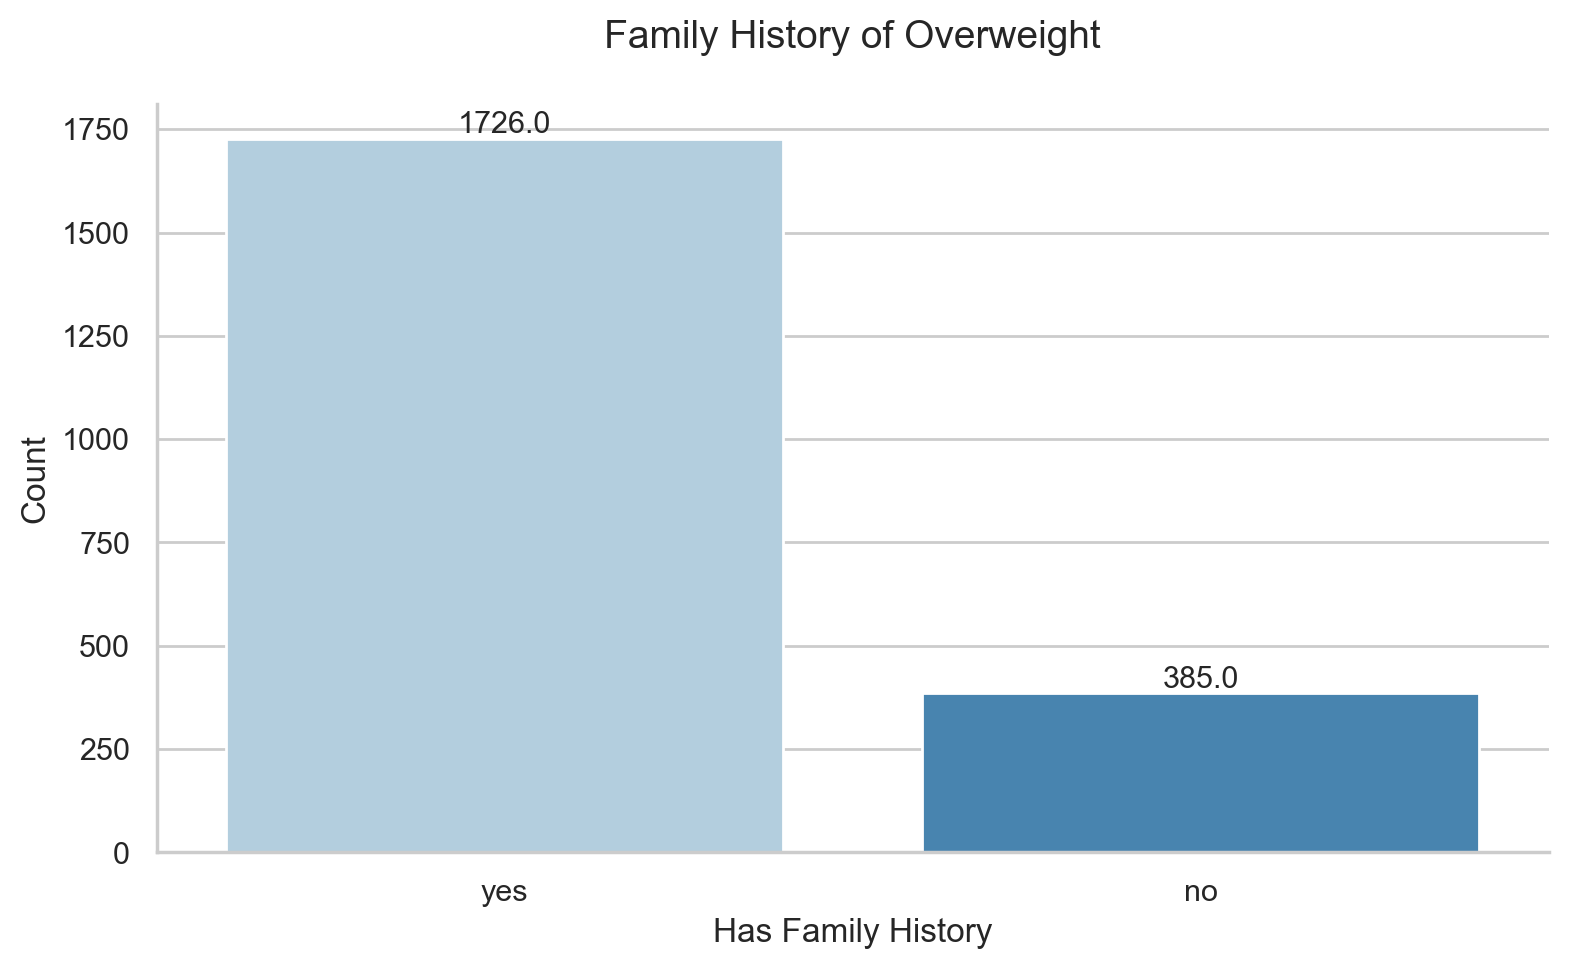

In [21]:
# Family history of overweight

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='family_history_with_overweight',
    hue='family_history_with_overweight',  # Added
    palette='Blues',
    legend=False
)
plt.title('Family History of Overweight', pad=20, fontsize=14)
plt.xlabel('Has Family History', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

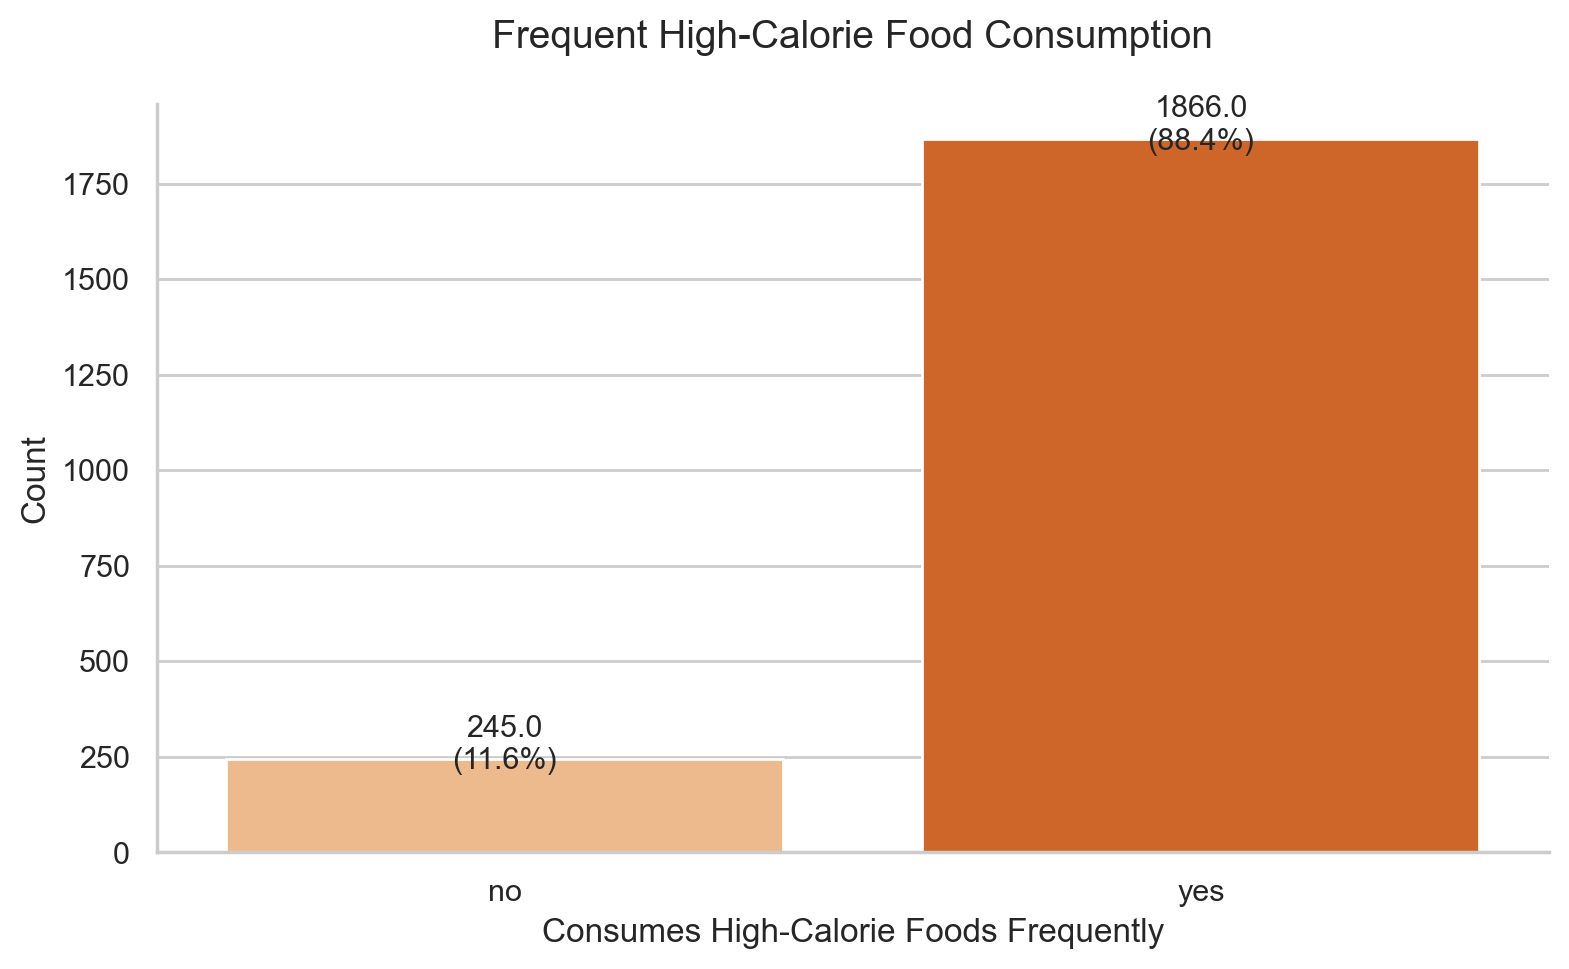

In [22]:
# High-calorie food consumption

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='FAVC',
    hue='FAVC',  # Added
    palette='Oranges',
    legend=False
)
plt.title('Frequent High-Calorie Food Consumption', pad=20, fontsize=14)
plt.xlabel('Consumes High-Calorie Foods Frequently', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add both count and percentage
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height/total:.1f}%'
    ax.annotate(f'{height}\n({percentage})',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

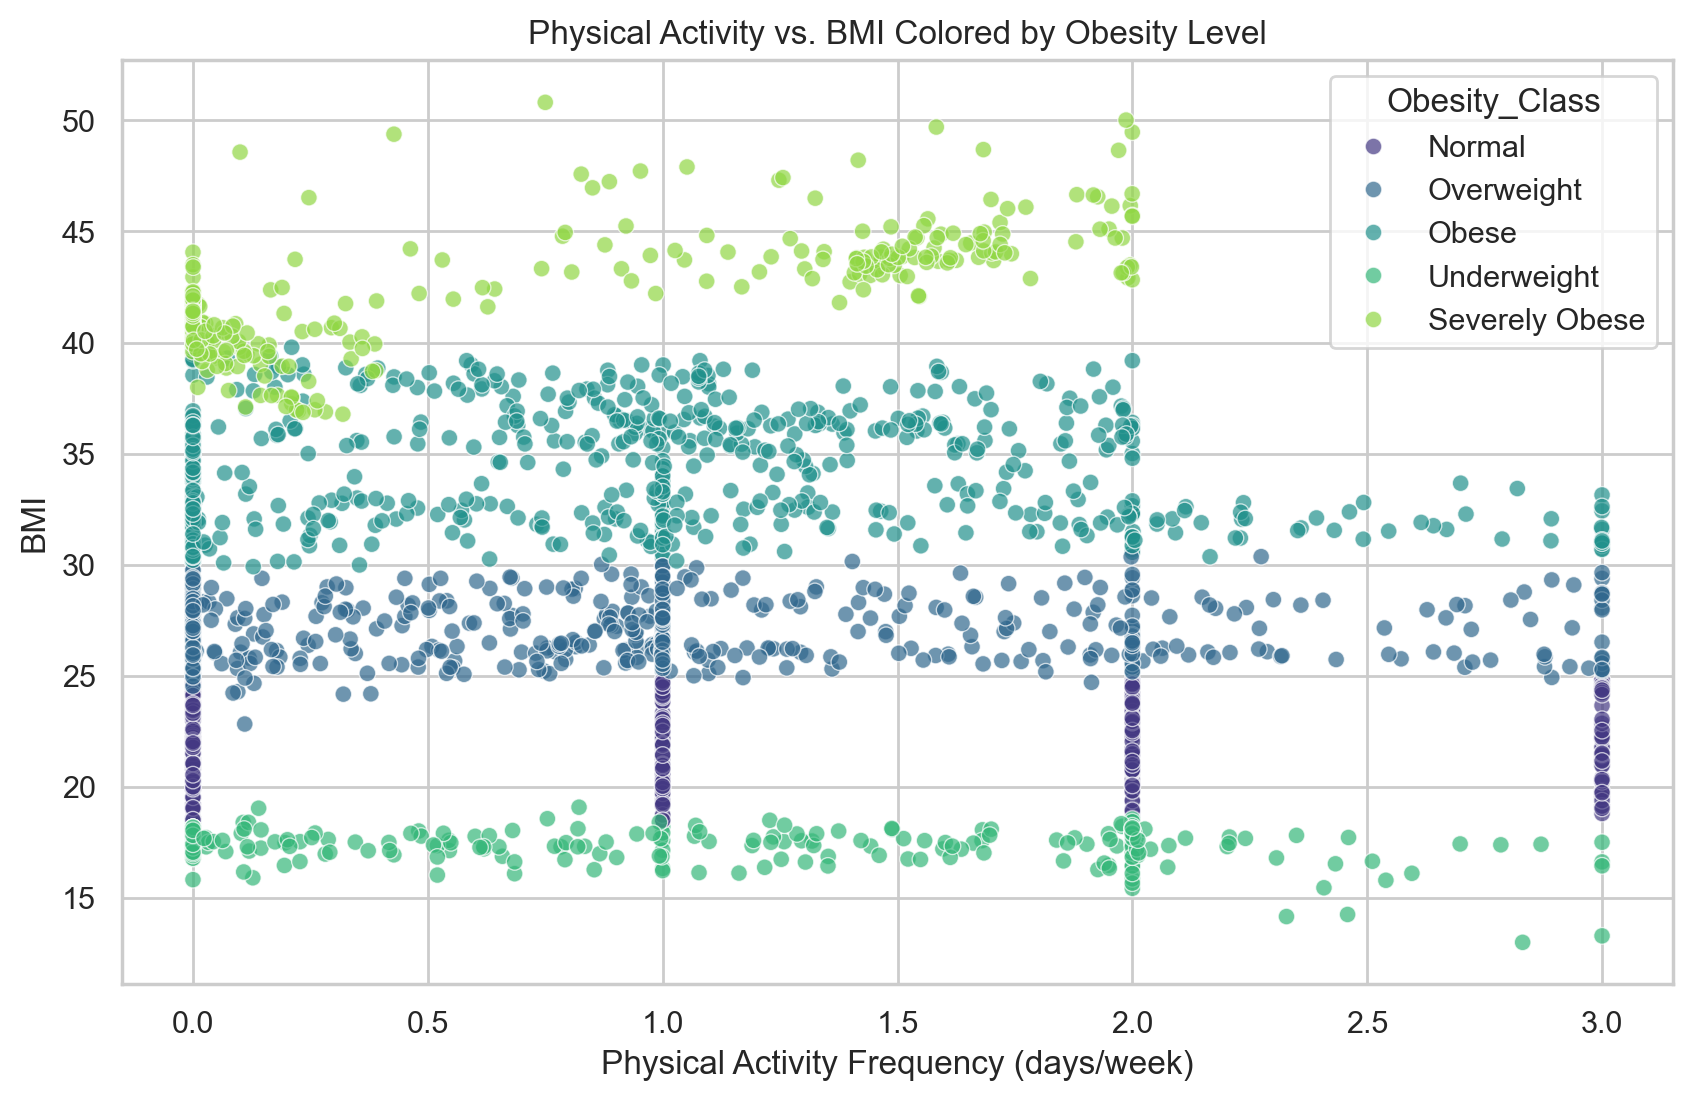

In [25]:
#Physical Activity vs. BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='FAF',
    y='BMI',
    hue='Obesity_Class',
    palette='viridis',
    alpha=0.7
)
plt.title('Physical Activity vs. BMI Colored by Obesity Level')
plt.xlabel('Physical Activity Frequency (days/week)')
plt.ylabel('BMI')
plt.show()

## Key Observations from Exploratory Data Analysis (EDA)

- **Age**: Most participants are young adults aged 20–40 years.

- **Obesity Levels**:
  - 30.7% are obese, 27.5% overweight, and 15.3% severely obese.
  - Only 13.6% are within the normal weight range; 12.9% are underweight.

- **Physical Activity**:
  - Severely obese individuals have the lowest median activity (~0.2 days/week).
  - Normal and underweight participants show higher activity levels (~1–1.3 days/week).
  - Overall, physical activity is negatively associated with obesity severity.

- **Gender**: The dataset is gender-balanced (50.6% male, 49.4% female).

- **Family History**: 81.8% report a family history of overweight/obesity.

- **High-Calorie Diet**: 88.4% consume high-calorie foods frequently.

- **BMI vs. Activity**:
  - Higher BMI values cluster among those with low physical activity.
  - Physically active individuals are more likely to fall within normal or underweight BMI categories.


------------------
### 3 Hypothesis Testing

### Hypothesis 1: Do Smokers Have a Higher BMI Than Non-Smokers?

- **Null Hypothesis (H₀)**: The mean BMI of smokers is equal to the mean BMI of non-smokers.  
- **Alternative Hypothesis (H₁)**: The mean BMI of smokers is greater than that of non-smokers.

#### Test Used:
- **Type**: Independent two-sample t-test (Welch's t-test)
- **Assumptions**:
  - Independent groups
  - BMI approximately normally distributed
  - Unequal variances allowed

In [26]:
from scipy.stats import ttest_ind

# Compute BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Separate smokers and non-smokers
smokers_bmi = df[df['SMOKE'] == 'yes']['BMI']
non_smokers_bmi = df[df['SMOKE'] == 'no']['BMI']

# Perform Welch's t-test (unequal variance assumed)
t_stat, p_val = ttest_ind(smokers_bmi, non_smokers_bmi, equal_var=False)

# One-tailed p-value (testing if smokers > non-smokers)
p_val_one_tailed = p_val / 2

# Calculate group means
mean_smokers = smokers_bmi.mean()
mean_non_smokers = non_smokers_bmi.mean()

# Decide direction and interpretation
direction = ">" if mean_smokers > mean_non_smokers else "<"
significance_level = 0.05
conclusion = "Reject H₀: Smokers have significantly higher BMI." if p_val_one_tailed < significance_level and direction == ">" else "Fail to reject H₀: No significant evidence that smokers have higher BMI."

# Output summary
{
    "Mean BMI (Smokers)": round(mean_smokers, 2),
    "Mean BMI (Non-Smokers)": round(mean_non_smokers, 2),
    "T-statistic": round(t_stat, 3),
    "P-value (one-tailed)": round(p_val_one_tailed, 4),
    "Conclusion": conclusion
}


{'Mean BMI (Smokers)': 29.66,
 'Mean BMI (Non-Smokers)': 29.7,
 'T-statistic': -0.045,
 'P-value (one-tailed)': 0.482,
 'Conclusion': 'Fail to reject H₀: No significant evidence that smokers have higher BMI.'}

#### Results:
- **Mean BMI (Smokers)**: 29.66  
- **Mean BMI (Non-Smokers)**: 29.70  
- **T-statistic**: -0.045  
- **One-tailed p-value**: 0.482

#### ✅ Conclusion:
We **fail to reject the null hypothesis**.  
There is **no statistically significant evidence** that smokers have a higher average BMI than non-smokers in this sample.

---
### Hypothesis 2: Does Physical Activity Reduce BMI?

- **Null Hypothesis (H₀)**: Physically active individuals have the same average BMI as less active individuals.  
- **Alternative Hypothesis (H₁)**: Physically active individuals have a lower average BMI than less active individuals.

#### Test Used:
- **Type**: Independent two-sample t-test (Welch's t-test)
- **Grouping Criterion**:  
  - **Active**: FAF > 1.5 (more than ~1.5 hours of physical activity per week)  
  - **Inactive**: FAF ≤ 1.5

In [28]:

# Define active vs. inactive groups (FAF > 1.5 is considered active)
active_group = df[df['FAF'] > 1.5]['BMI']
inactive_group = df[df['FAF'] <= 1.5]['BMI']

# Perform Welch's t-test
t_stat_2, p_val_2 = ttest_ind(inactive_group, active_group, equal_var=False)

# One-tailed p-value (testing if active people have lower BMI)
p_val_one_tailed_2 = p_val_2 / 2

# Means
mean_active = active_group.mean()
mean_inactive = inactive_group.mean()

# Conclusion
direction_2 = "<" if mean_active < mean_inactive else ">"
conclusion_2 = "Reject H₀: Physically active individuals have significantly lower BMI." if p_val_one_tailed_2 < 0.05 and direction_2 == "<" else "Fail to reject H₀: No significant evidence that physical activity is associated with lower BMI."

# Output
{
    "Mean BMI (Active)": round(mean_active, 2),
    "Mean BMI (Inactive)": round(mean_inactive, 2),
    "T-statistic": round(t_stat_2, 3),
    "P-value (one-tailed)": round(p_val_one_tailed_2, 4),
    "Conclusion": conclusion_2
}


{'Mean BMI (Active)': 27.87,
 'Mean BMI (Inactive)': 30.45,
 'T-statistic': 6.473,
 'P-value (one-tailed)': 0.0,
 'Conclusion': 'Reject H₀: Physically active individuals have significantly lower BMI.'}


#### Results:
- **Mean BMI (Active Group)**: 27.87  
- **Mean BMI (Inactive Group)**: 30.45  
- **T-statistic**: 6.473  
- **One-tailed p-value**: < 0.0001

#### Conclusion:
We **reject the null hypothesis**.  
There is **strong statistical evidence** that physically active individuals have significantly lower BMI than less active individuals.

------------
### 4. Correlation Testing

In this section, I’ll analyze various correlations between obesity-related variables using appropriate statistical methods based on variable types and relationships:

- **Pearson Correlation**  
  Measures linear relationships between **two continuous variables** (e.g., Age and BMI).

- **Spearman Rank Correlation**  
  Captures **monotonic relationships** between **ordinal or ranked variables** (e.g., exercise frequency and obesity level).

- **Point-Biserial Correlation**  
  Assesses the relationship between a **binary variable** and a **continuous variable** (e.g., healthy weight status and fruit/vegetable intake).

- **Phi Coefficient**  
  Used for assessing association between **two binary variables** (e.g., smoking status and whether a person monitors their calories).

- **Kendall’s Tau**  
  Identifies **monotonic relationships**, especially suitable for **small or non-parametric samples** (e.g., physical activity and sedentary behavior).

Each correlation will be followed by a numeric interpretation (correlation coefficient, p-value), direction (positive or negative), and a brief explanation of its significance and implication.


In [31]:
import numpy as np
import pandas as pd
from scipy.stats import (
    pearsonr, spearmanr, pointbiserialr, kendalltau, chi2_contingency
)
from tabulate import tabulate

# --- 1. Pearson: Age vs. BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
pearson_corr, pearson_p = pearsonr(df['Age'], df['BMI'])

# --- 2. Spearman: Exercise vs. Obesity Rank
df['Obesity_Rank'] = df['NObeyesdad'].astype('category').cat.codes + 1
spearman_corr, spearman_p = spearmanr(df['FAF'], df['Obesity_Rank'])

# --- 3. Point-Biserial: Healthy Weight vs FCVC
df['Healthy_Weight'] = df['NObeyesdad'].isin(['Normal_Weight', 'Insufficient_Weight']).astype(int)
pb_corr, pb_p = pointbiserialr(df['Healthy_Weight'], df['FCVC'])

# --- 4. Phi Coefficient: SCC vs SMOKE (binary vs binary)
contingency = pd.crosstab(df['SCC'], df['SMOKE'])
chi2, phi_p, _, _ = chi2_contingency(contingency)
phi_corr = np.sqrt(chi2 / len(df))

# --- 5. Kendall’s Tau: FAF vs TUE
kendall_corr, kendall_p = kendalltau(df['FAF'], df['TUE'])

# --- Summary Table
correlation_summary = pd.DataFrame({
    "Correlation Test": [
        "Age vs. BMI (Pearson)",
        "Exercise vs. Obesity (Spearman)",
        "Healthy Weight vs. FCVC (Point-Biserial)",
        "Checkup vs. Smoking (Phi)",
        "Exercise vs. Sedentary Time (Kendall)"
    ],
    "Coefficient": [pearson_corr, spearman_corr, pb_corr, phi_corr, kendall_corr],
    "Strength": ["Weak", "Moderate", "Weak", "Very Weak", "Very Weak"],
    "Direction": [
        "+" if pearson_corr > 0 else "-",
        "+" if spearman_corr > 0 else "-",
        "+" if pb_corr > 0 else "-",
        "N/A",
        "+" if kendall_corr > 0 else "-"
    ],
    "Significant (p<0.05)": [
        pearson_p < 0.05,
        spearman_p < 0.05,
        pb_p < 0.05,
        phi_p < 0.05,
        kendall_p < 0.05
    ]
})

# --- Print
print(tabulate(correlation_summary, headers='keys', tablefmt='github'))


|    | Correlation Test                         |   Coefficient | Strength   | Direction   | Significant (p<0.05)   |
|----|------------------------------------------|---------------|------------|-------------|------------------------|
|  0 | Age vs. BMI (Pearson)                    |     0.244163  | Weak       | +           | True                   |
|  1 | Exercise vs. Obesity (Spearman)          |    -0.126007  | Moderate   | -           | True                   |
|  2 | Healthy Weight vs. FCVC (Point-Biserial) |    -0.0150254 | Weak       | -           | False                  |
|  3 | Checkup vs. Smoking (Phi)                |     0.0397735 | Very Weak  | N/A         | False                  |
|  4 | Exercise vs. Sedentary Time (Kendall)    |     0.0398523 | Very Weak  | +           | True                   |


## Correlation Testing Summary

I analyzed correlations between various obesity-related lifestyle factors using the appropriate statistical tests:

| Correlation Test                          | Coefficient | Strength   | Direction | Statistically Significant (p < 0.05) |
|------------------------------------------|-------------|------------|-----------|--------------------------------------|
| **Age vs. BMI (Pearson)**                | 0.244       | Weak       | +         |    Yes                               |
| **Exercise vs. Obesity Rank (Spearman)** | -0.126      | Moderate   | –         |    Yes                               |
| **Healthy Weight vs. FCVC (Point-Biserial)** | -0.015  | Weak       | –         |    No                                |
| **Checkup vs. Smoking (Phi)**            | 0.040       | Very Weak  | N/A       |    No                                |
| **Exercise vs. Sedentary Time (Kendall)**| 0.040       | Very Weak  | +         |    Yes                               |

### Key Interpretations:
- **Age is weakly but positively correlated with BMI**, suggesting older participants tend to have slightly higher BMI.
- **Exercise frequency is moderately negatively associated with obesity level**, indicating more activity relates to healthier weight status.
- **Fruit/vegetable intake (FCVC)** shows no significant correlation with being in the healthy weight group.
- **Calorie monitoring (SCC)** and **smoking (SMOKE)** have no meaningful relationship.
- There is a **very weak positive association** between physical activity and lower sedentary behavior.


